## K-Nearest Neighbors (KNN)

This notebook demonstrates the implementation of the K-Nearest Neighbors (KNN) algorithm to classify an image using a provided dataset. We will perform 1-NN, 3-NN, and 5-NN classification and evaluate the results.


## 1. Importing Required Libraries

In [10]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from collections import Counter


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [11]:
import numpy as np
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


(32, 32, 3)

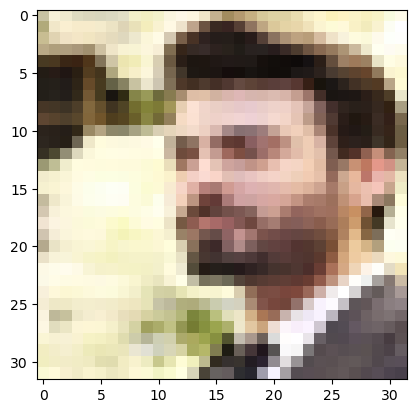

In [12]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,40])
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

You Need to write your code in this block.

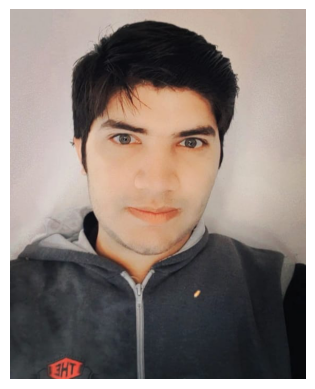

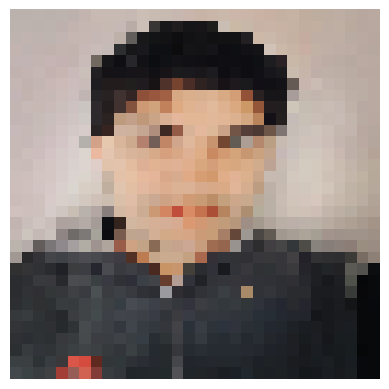

In [13]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from collections import Counter

for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

    #Read your image here
####### Your code here #######
image_path = './mypic.jpeg'
img = Image.open(image_path)
img = np.array(img)  # Convert to numpy array
plt.imshow(img)
plt.axis('off')
plt.show()


############################
    #Resize your image
####### Your code here #######
# resized_image = img.resize((32, 32))
resized_image = cv2.resize(img, (32, 32))  # Resize to 32x32
plt.imshow(resized_image)
plt.axis('off')
plt.show()




##############################
    #Reshape your image as we reshape the image of dataset
####### Your code here #######
reshaped_image = resized_image.flatten(order="F")
reshaped_image = reshaped_image / 255.0  # Normalize the image

# This flattens the 2D image (32x32) into a 1D array (a long list of pixel values).(from top to bottom) which matches the way images are stored in your dataset.
# Normalizes the pixel values to be between 0 and 1. Original pixel values are between 0 and 255, and dividing by 255 scales them down to a range from 0 to 1.



#############################
    #Calculate Eucleadian distance between your image and dataset
####### Your code here #######
def euclidean_distance(image1, image2):
    return np.linalg.norm(image1 - image2)
# calculates the distance between the two images in a multi-dimensional space. Smaller distances mean the images are more similar.

# going to comment because it is being calculated with 1,3,5 NN but code is here if needed or required
# min_distance = float('inf')
# min_index = -1

# for i in range(50):
#     G = im[:,:,:,i]
#     G = np.reshape(G, [-1], order="F") / 255.0  # Normalize the dataset images

#     distance = euclidean_distance(reshaped_image, G)
#     if distance < min_distance:
#         min_distance = distance
#         min_index = i

# print(f"The closest match is image {min_index} with a distance of {min_distance}")



##############################

In this Block you need to fill the code for 1-NN.

The closest match is image 42 with a distance of 15.251315673009508


NameError: name 'labels' is not defined

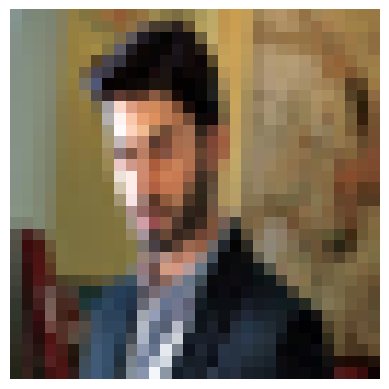

In [14]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists

####### Your code here #######
min_distance = float('inf')
min_index = -1

# min_distance is initially set to a very large number (float('inf')). This is to ensure that any real distance we calculate will be smaller than this value. min_index is set to -1 to keep track of which image has the smallest distance


for i in range(50):
    G = im[:, :, :, i]
    G = np.reshape(G, [-1], order="F") / 255.0  # Normalize the dataset images

    distance = euclidean_distance(reshaped_image, G)
    if distance < min_distance:
        min_distance = distance
        min_index = i

# Display the closest match for 1NN
print(f"The closest match is image {min_index} with a distance of {min_distance}")
closest_image = im[:, :, :, min_index]
plt.imshow(closest_image)
plt.axis('off')
plt.title(f"1NN - Label: {labels[min_index]}")
plt.show()

##############################


Write code for 3 NN


The three closest matches are images [42, 13, 23] with distances [15.251315673009508, 15.57728706664886, 15.738749971735944]


NameError: name 'labels' is not defined

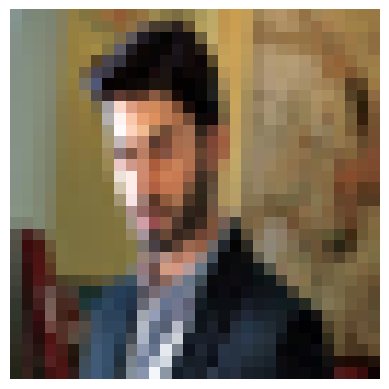

In [15]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######
distances = []

for i in range(50):
    G = im[:, :, :, i]
    G = np.reshape(G, [-1], order="F") / 255.0  # Normalize the dataset images

    distance = euclidean_distance(reshaped_image, G)
    distances.append((distance, i))

# Sort the distances and get the indices of the three smallest distances
distances.sort(key=lambda x: x[0])
three_min_indices = [distances[i][1] for i in range(3)]

# Display the results for 3NN
print(f"The three closest matches are images {three_min_indices} with distances {[distances[i][0] for i in range(3)]}")

# Display the three closest images for 3NN
for index in three_min_indices:
    closest_image = im[:, :, :, index]
    plt.imshow(closest_image)
    plt.axis('off')
    plt.title(f"3NN - Label: {labels[index]}")
    plt.show()

# Majority voting for 3NN
closest_labels = [str(labels[index].flatten()[0]) for index in three_min_indices]  # Convert labels to strings i
most_common_label = Counter(closest_labels).most_common(1)[0][0]
# Find the most common label among the three closest images using majority voting.
print(f"Most common label among 3 nearest neighbors: {most_common_label}")


##############################

Write code for 5 NN

The five closest matches are images [42, 13, 23, 48, 47] with distances [15.250131317149744, 15.577489945517257, 15.737870047538772, 16.011373792849035, 16.047989354501198]


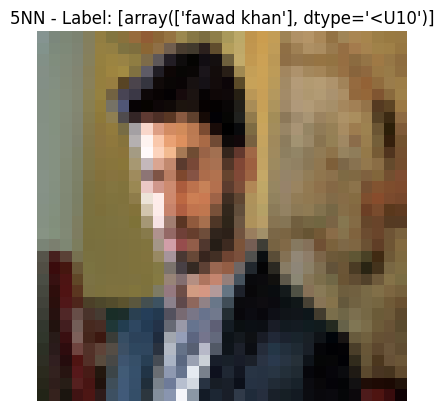

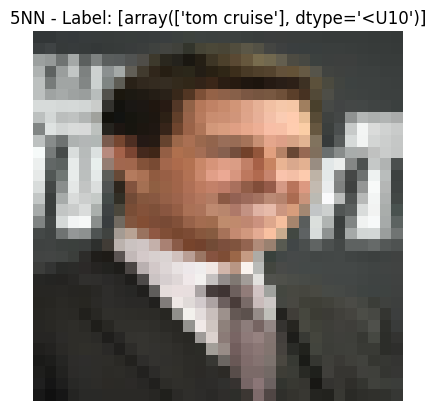

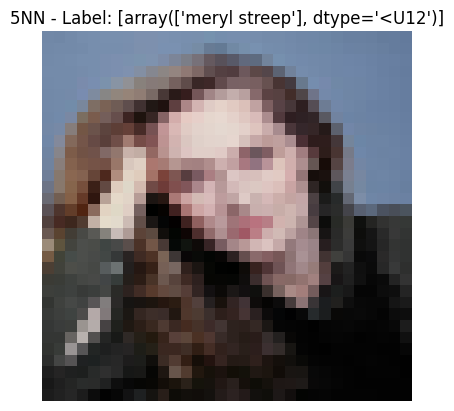

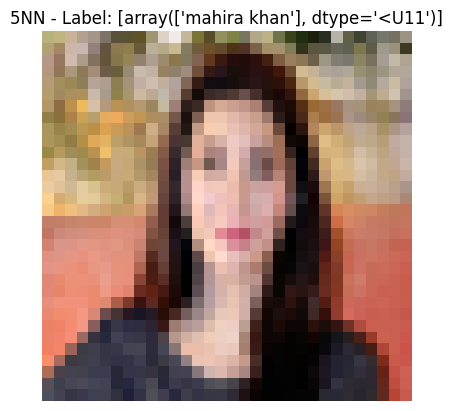

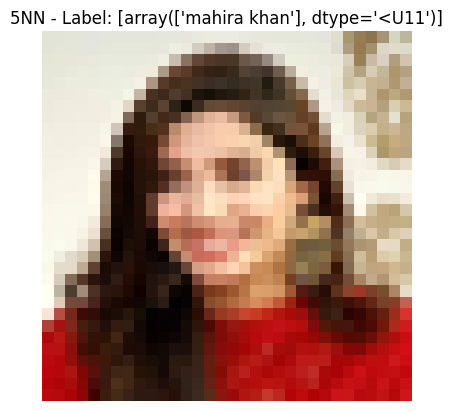

Most common label among 5 nearest neighbors: ['mahira khan']


In [ ]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######
distances = []

for i in range(50):
    G = im[:, :, :, i]
    G = np.reshape(G, [-1], order="F") / 255.0  # Normalize the dataset images

    distance = euclidean_distance(reshaped_image, G)
    distances.append((distance, i))

# Sort the distances and get the indices of the five smallest distances
distances.sort(key=lambda x: x[0])
five_min_indices = [distances[i][1] for i in range(5)]

# Display the results for 5NN
print(f"The five closest matches are images {five_min_indices} with distances {[distances[i][0] for i in range(5)]}")

# Display the five closest images for 5NN
for index in five_min_indices:
    closest_image = im[:, :, :, index]
    plt.imshow(closest_image)
    plt.axis('off')
    plt.title(f"5NN - Label: {labels[index]}")
    plt.show()

# Majority voting if needed
closest_labels = [str(labels[index].flatten()[0]) for index in five_min_indices]  # Convert labels to strings
most_common_label = Counter(closest_labels).most_common(1)[0][0]
print(f"Most common label among 5 nearest neighbors: {most_common_label}")

##############################